Categorical Features: ['Date', 'type', 'region']
Numerical Features: ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

Percentage of missing values in categorical features:
Date      0.0
type      0.0
region    0.0
dtype: float64

Percentage of missing values in numerical features:
Unnamed: 0      0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
year            0.0
dtype: float64


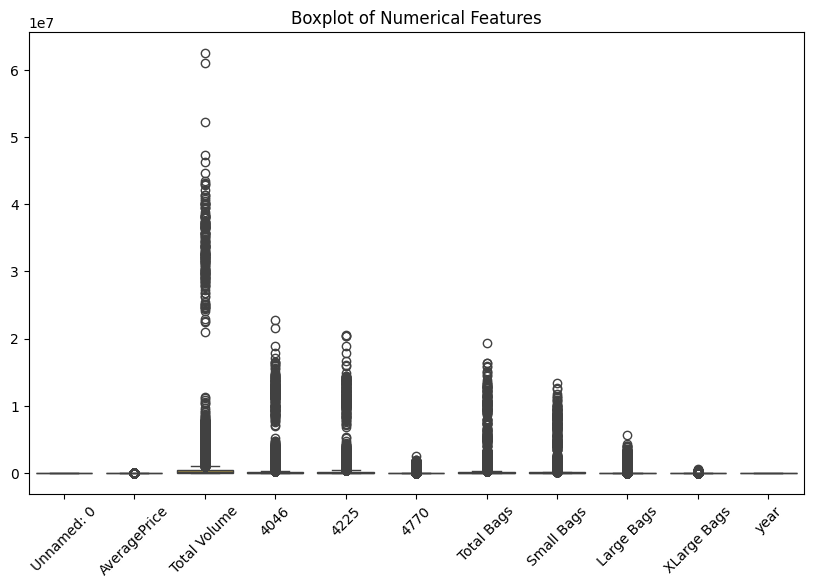

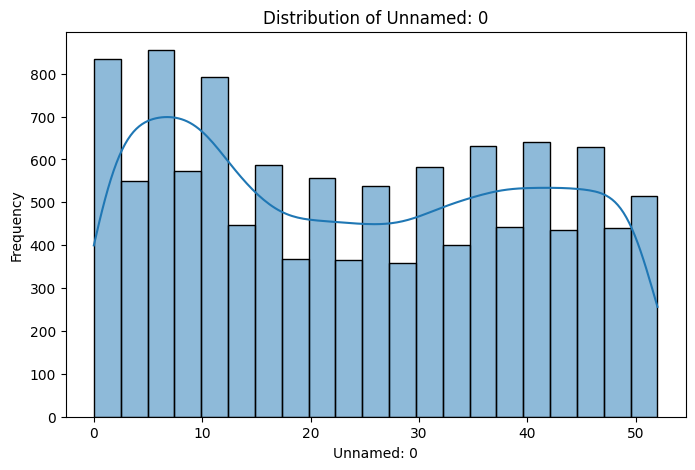

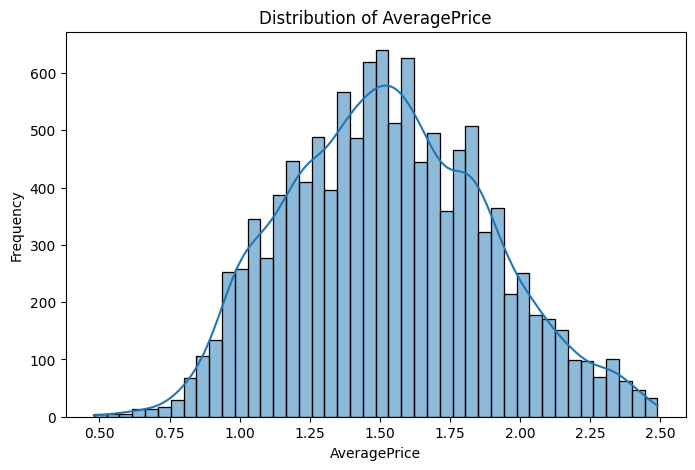

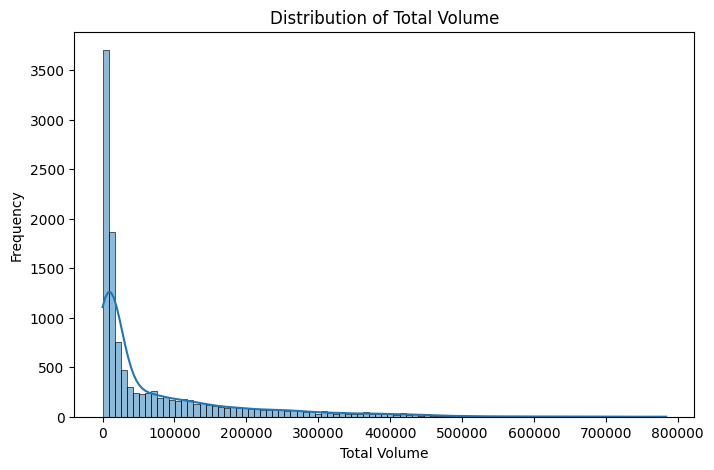

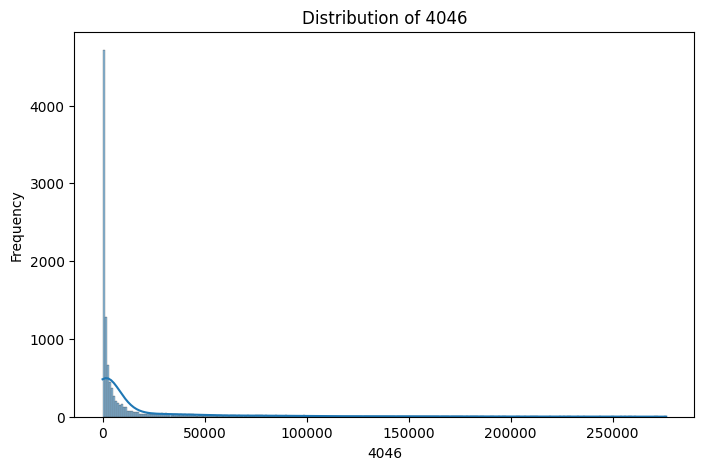

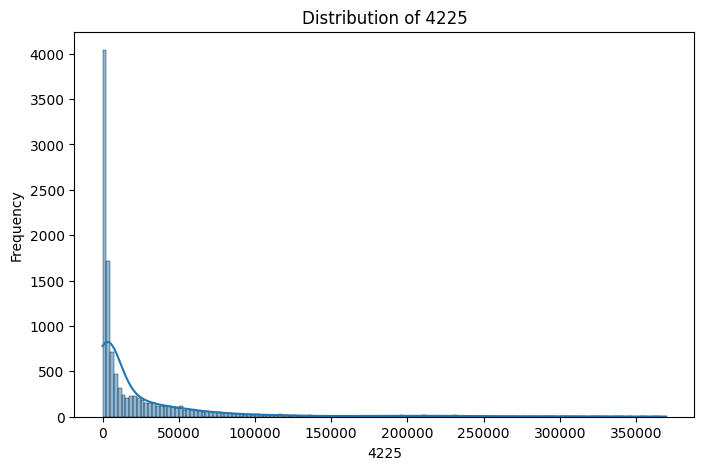

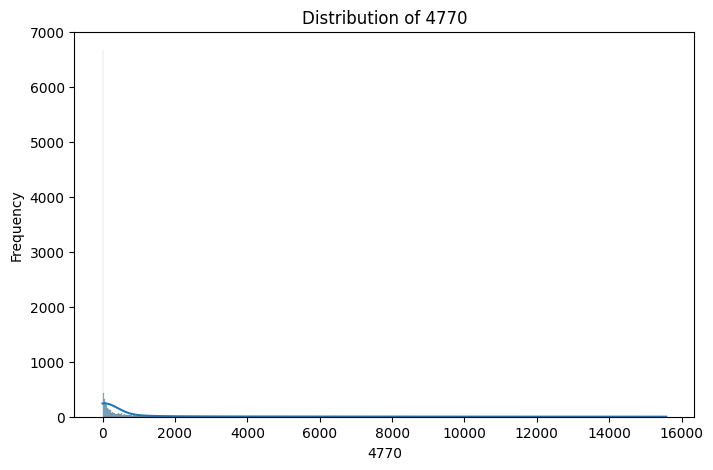

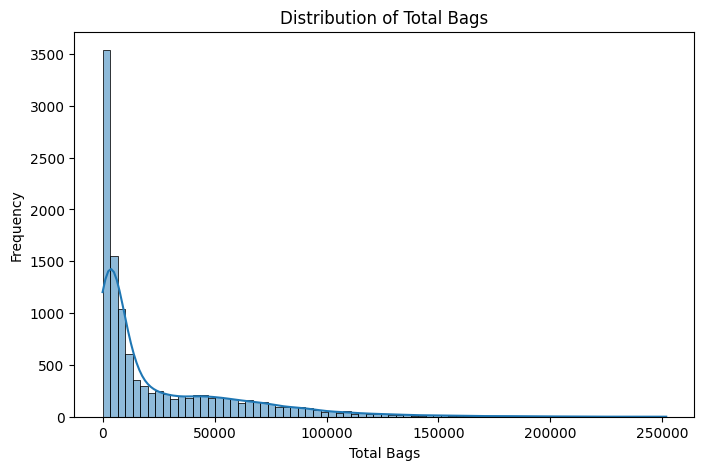

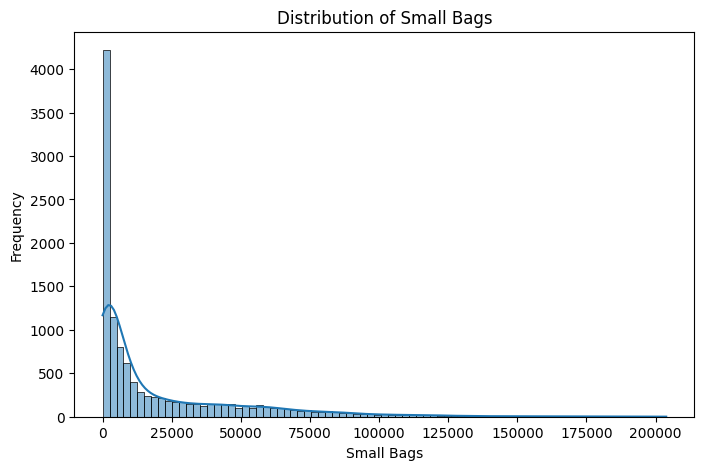

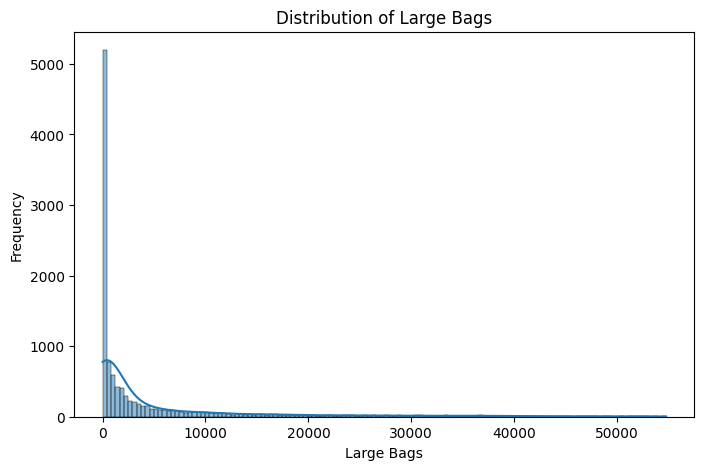

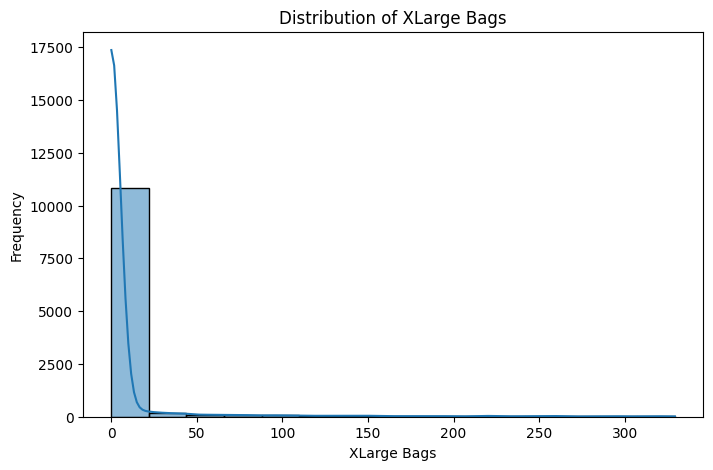

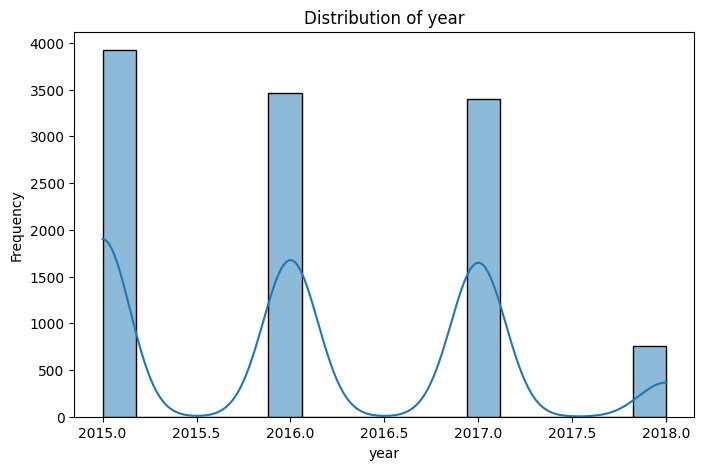

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("avocado.csv")  # Update 'your_dataset.csv' with your dataset file name

# List the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Identify the percentage of missing values
missing_categorical = df[categorical_features].isnull().mean() * 100
missing_numerical = df[numerical_features].isnull().mean() * 100

print("\nPercentage of missing values in categorical features:")
print(missing_categorical)
print("\nPercentage of missing values in numerical features:")
print(missing_numerical)

# Examine the spread of numerical data and identify outliers using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Handle outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1 #handling outliers using inter quartile range
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Distribution plot
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [2]:
#THIS IS WITH NUMERICAL ASSIGNMENT INSTEAD OF ONE HOT
# THIS IS THE FINAL

import numpy as np # to handle numerical calculation
import pandas as pd # To handle the dataset
from sklearn.impute import SimpleImputer # To fill out missing values
from sklearn.model_selection import train_test_split # Spliting the data to test and train dataset (optional)

# Read the dataset
dataset = pd.read_csv('avocado.csv')

# Handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Filling the missing values with mean of the values of that column, fills the missing value with na temp for calculation
numerical_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
imputer.fit(dataset[numerical_columns])
dataset[numerical_columns] = imputer.transform(dataset[numerical_columns])

# Get unique values in the 'region' column
unique_regions = dataset['region'].unique() # getting the set of the regions

# Create a dictionary to map each region to a numerical label
region_dict = {region: i for i, region in enumerate(unique_regions)} # getting a numerical value for each of the regions

# Replace region names with numerical labels in the 'region' column
dataset['region'] = dataset['region'].map(region_dict) # mapping the regions to their values in the dataset

# Convert 'Date' column to integer representation
dataset['Date'] = pd.to_datetime(dataset['Date']) #converting the date to date object
dataset['Date'] = dataset['Date'].dt.year * 10000 + dataset['Date'].dt.month * 100 + dataset['Date'].dt.day # converting the date object to integer

# Splitting the dataset into independent and dependent variables
X = dataset.drop(columns=['Unnamed: 0']) # dropping the serial number as it doesnt contribute to the result, so insignificant
Y = dataset['AveragePrice'] # This is the target column in case we feed it to a model to train it

# Splitting the dataset into the Training set and Test set
X_train, X_test, _, _ = train_test_split(X, Y, test_size=0.2, random_state=1) # splitting the data in the ratio of 80:20 ratio

# Save preprocessed training data
X_train_preprocessed = pd.DataFrame(X_train, columns=X_train.columns)
X_train_preprocessed.to_csv('X_train_preprocessed_avo.csv', index=False)

# Save preprocessed testing data
X_test_preprocessed = pd.DataFrame(X_test, columns=X_test.columns)
X_test_preprocessed.to_csv('X_test_preprocessed_avo.csv', index=False)

print("Preprocessed data saved successfully!")


Preprocessed data saved successfully!


Categorical Features: ['type']
Numerical Features: ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region']

Percentage of missing values in categorical features:
type    0.0
dtype: float64

Percentage of missing values in numerical features:
Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
year            0.0
region          0.0
dtype: float64


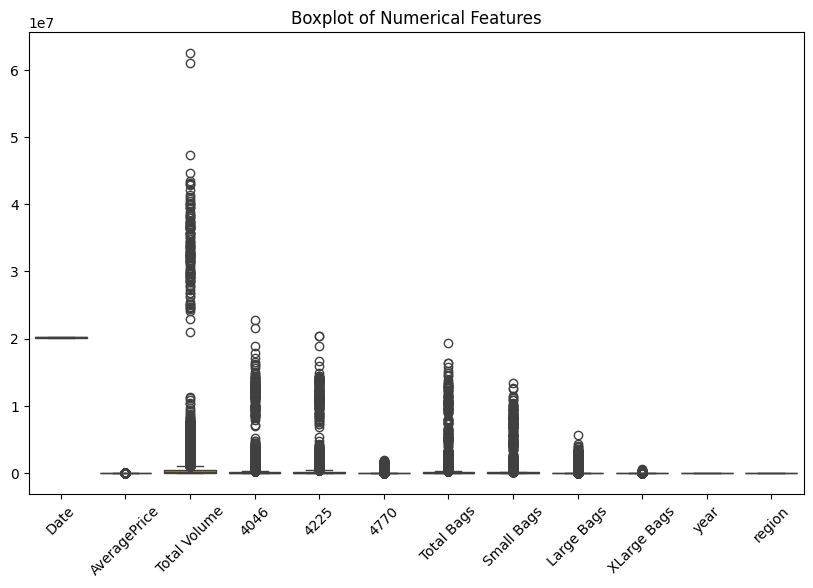

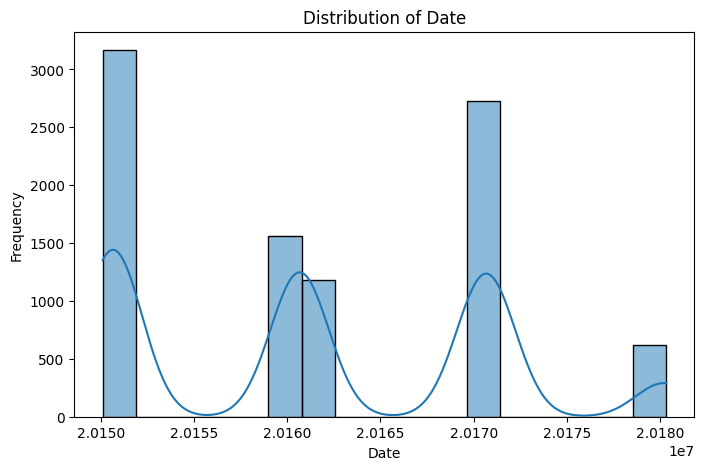

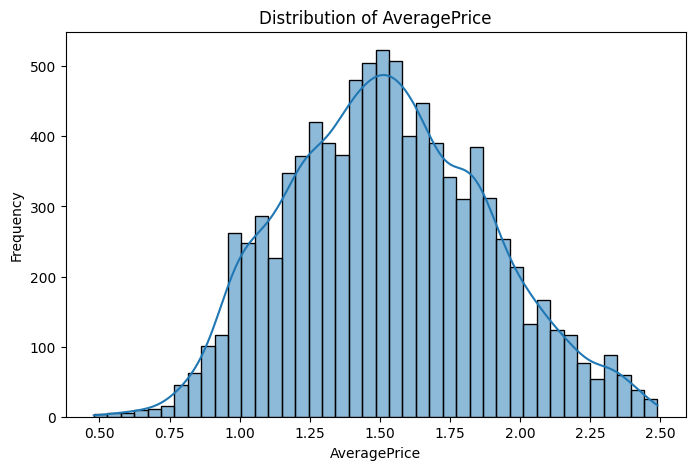

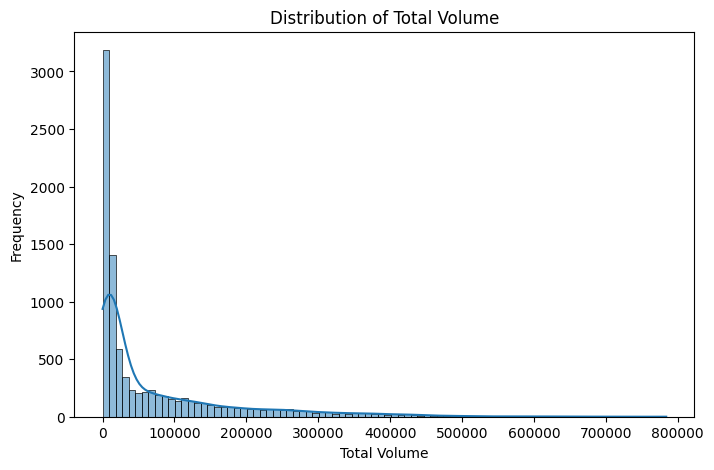

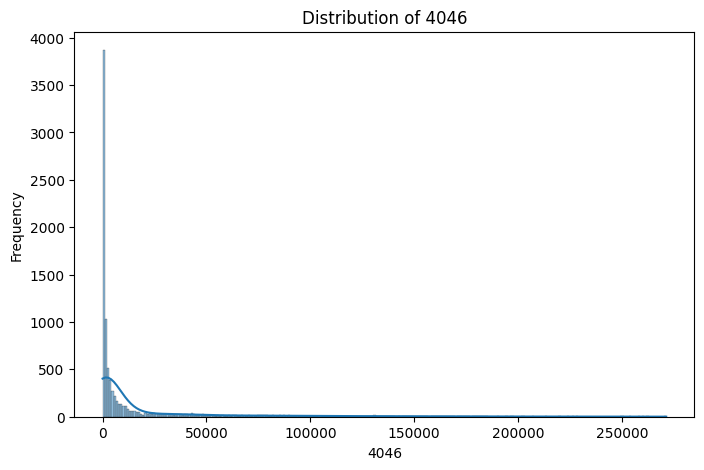

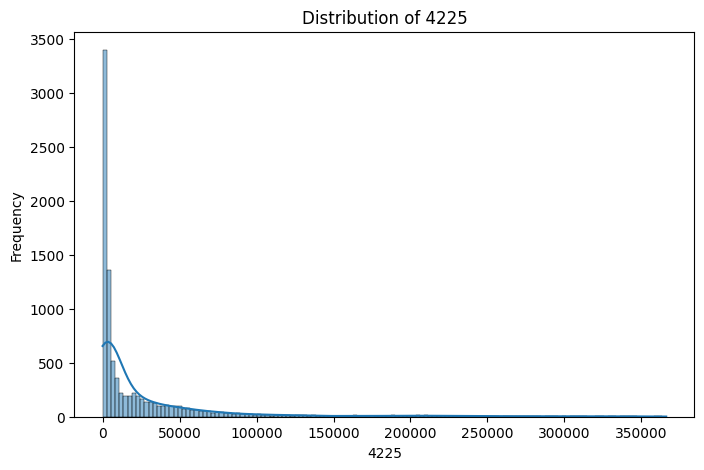

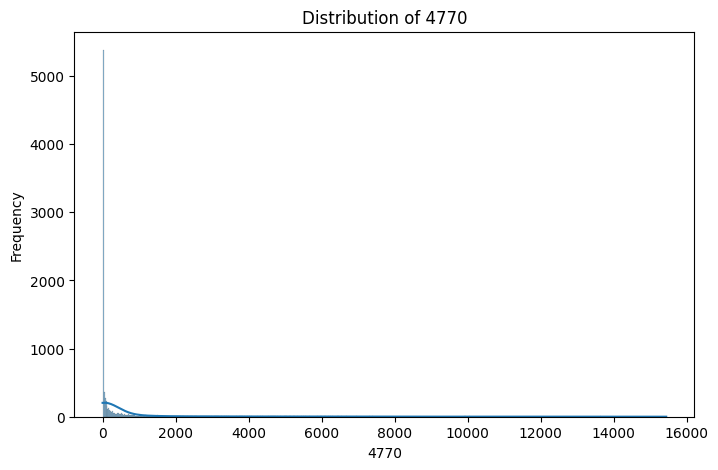

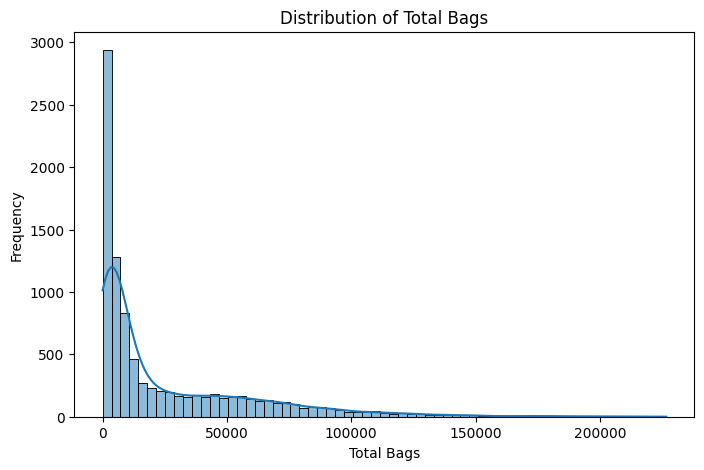

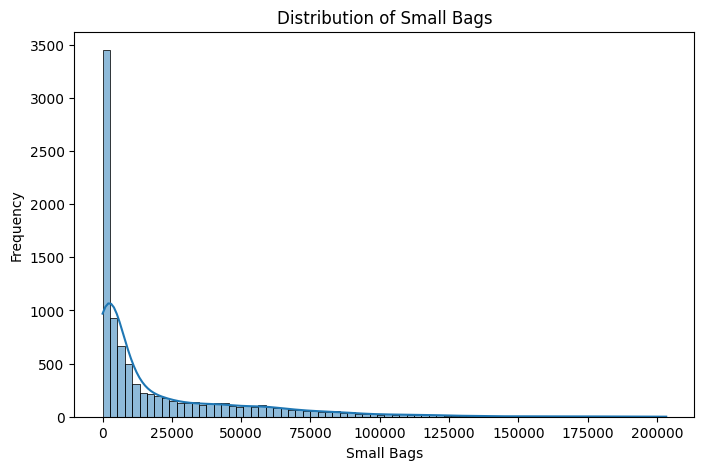

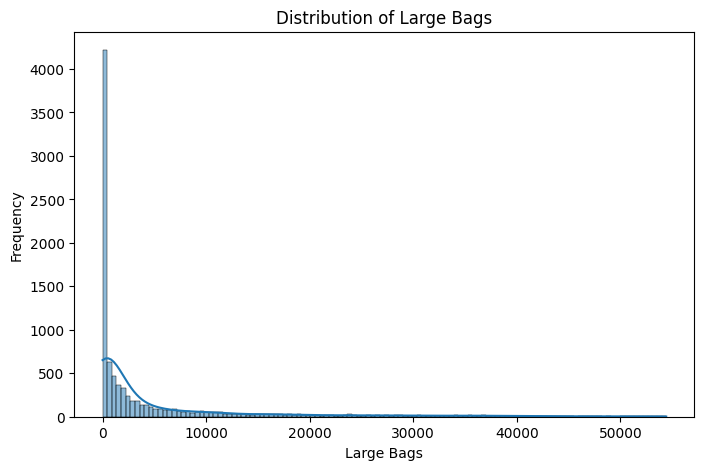

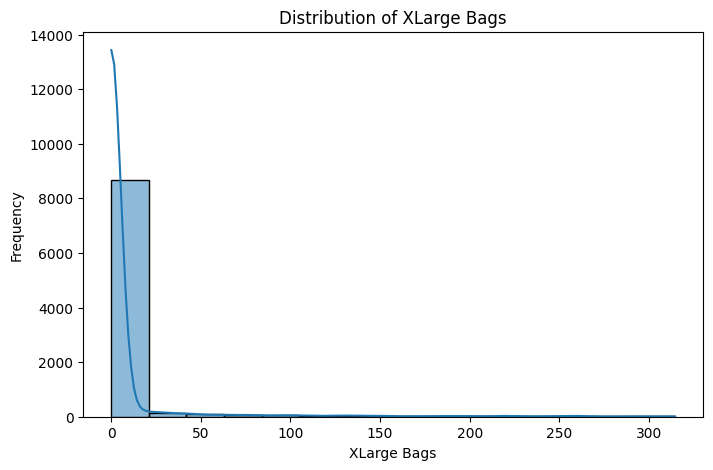

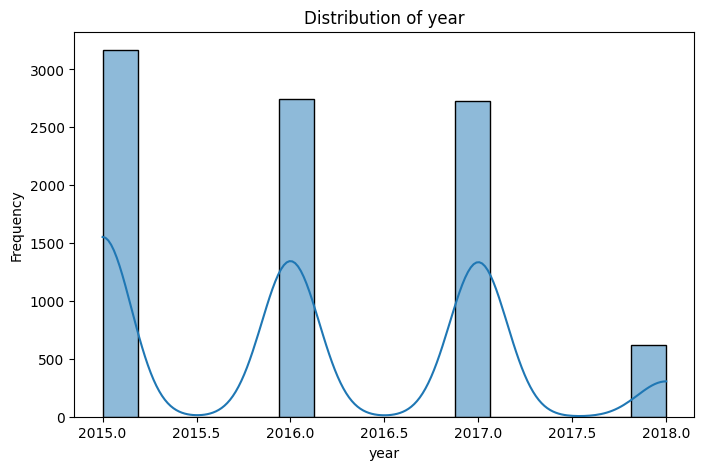

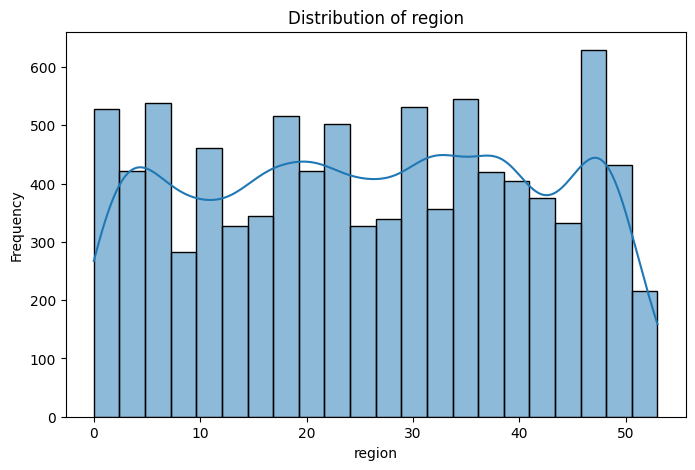

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("X_train_preprocessed_avo.csv")  # Update 'your_dataset.csv' with your dataset file name

# List the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Identify the percentage of missing values
missing_categorical = df[categorical_features].isnull().mean() * 100
missing_numerical = df[numerical_features].isnull().mean() * 100

print("\nPercentage of missing values in categorical features:")
print(missing_categorical)
print("\nPercentage of missing values in numerical features:")
print(missing_numerical)

# Examine the spread of numerical data and identify outliers using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Handle outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1 #handling outliers using inter quartile range
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Distribution plot
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

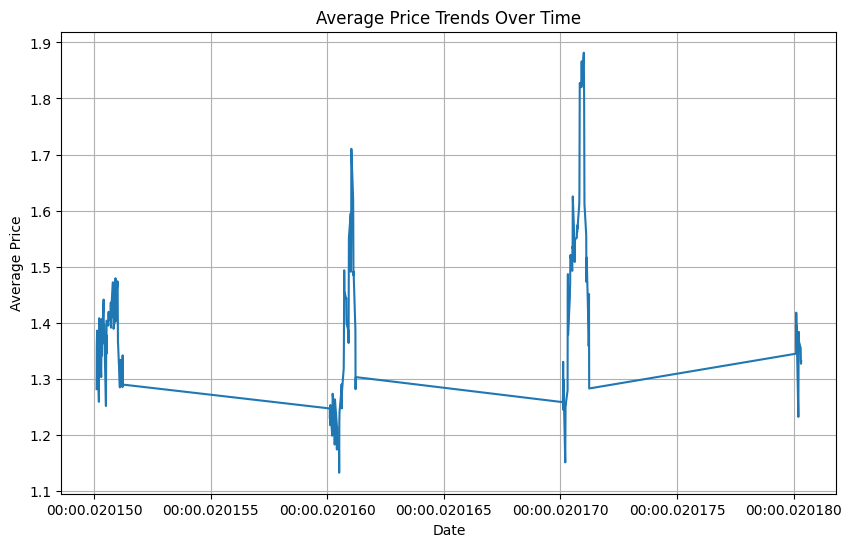

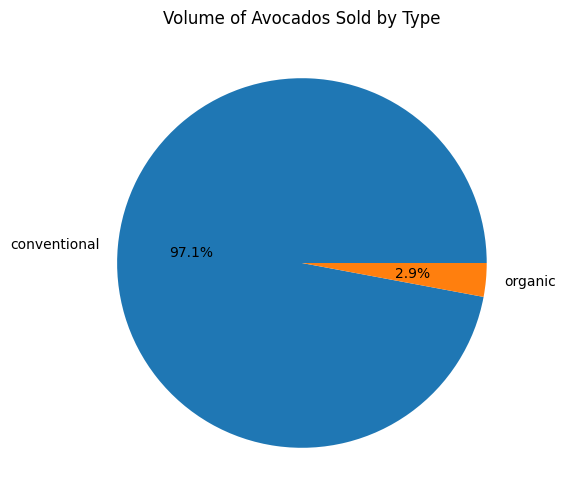

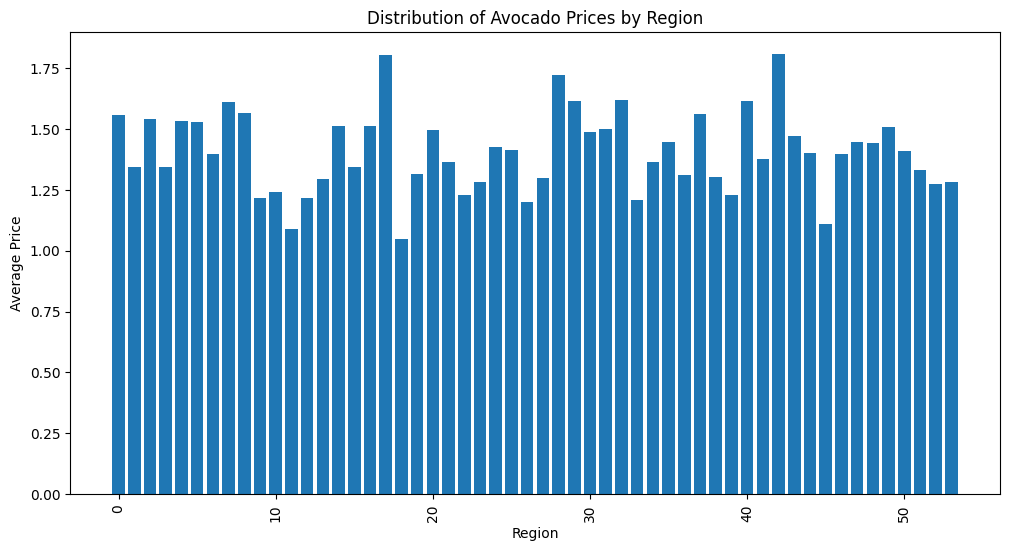

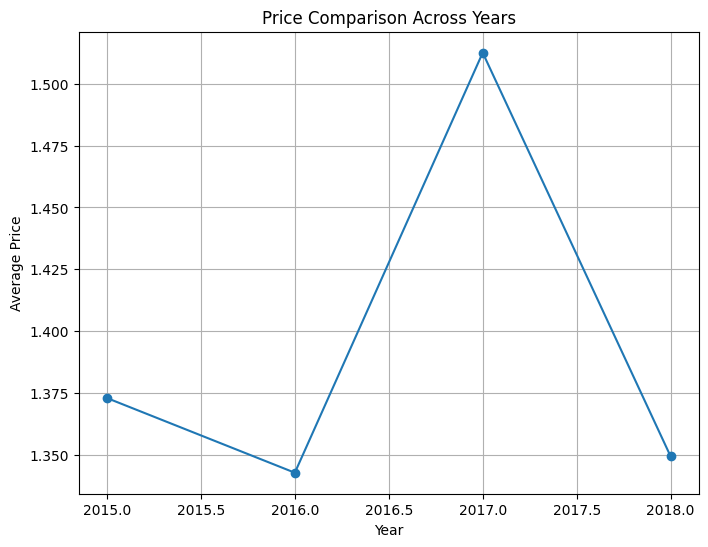

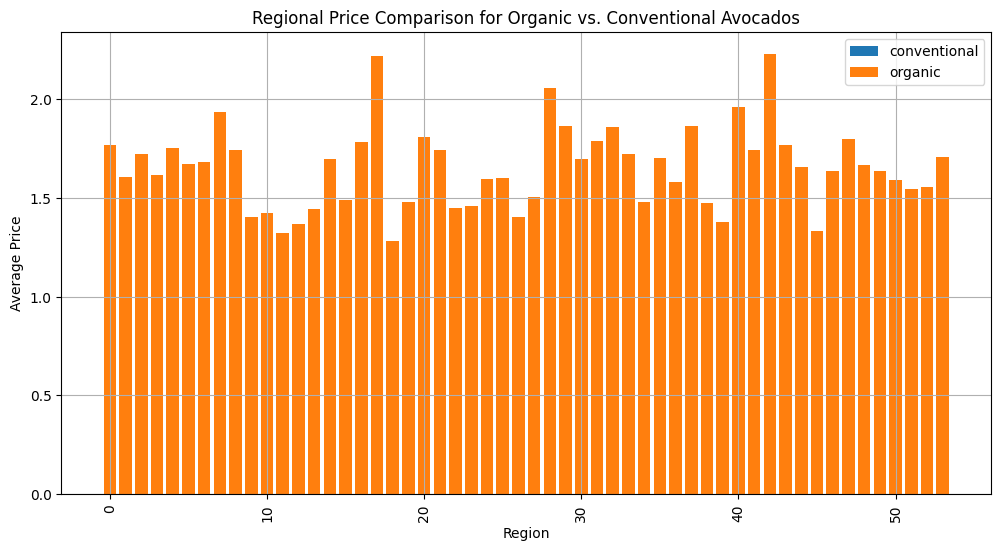

In [4]:
#QUERIES
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
dataset = pd.read_csv("X_train_preprocessed_avo.csv")

# 1. Average Price Trends Over Time
average_price_over_time = dataset.groupby('Date')['AveragePrice'].mean().reset_index()
average_price_over_time['Date'] = pd.to_datetime(average_price_over_time['Date'])  # Convert Date to datetime
plt.figure(figsize=(10, 6))
plt.plot(average_price_over_time['Date'], average_price_over_time['AveragePrice'])
plt.title('Average Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# 2. Volume of Avocados Sold by Type
volume_by_type = dataset.groupby('type')['Total Volume'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(volume_by_type['Total Volume'], labels=volume_by_type['type'], autopct='%1.1f%%')
plt.title('Volume of Avocados Sold by Type')
plt.show()

# 3. Distribution of Avocado Prices by Region
price_by_region = dataset.groupby('region')['AveragePrice'].mean().reset_index().sort_values(by='AveragePrice', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(price_by_region['region'], price_by_region['AveragePrice'])
plt.title('Distribution of Avocado Prices by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# 5. Price Comparison Across Years
price_comparison_across_years = dataset.groupby('year')['AveragePrice'].mean().reset_index().sort_values(by='year')
plt.figure(figsize=(8, 6))
plt.plot(price_comparison_across_years['year'], price_comparison_across_years['AveragePrice'], marker='o')
plt.title('Price Comparison Across Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# 6. Regional Price Comparison for Organic vs. Conventional Avocados
regional_price_comparison = dataset.groupby(['region', 'type'])['AveragePrice'].mean().reset_index()
plt.figure(figsize=(12, 6))
for avocado_type in regional_price_comparison['type'].unique():
    plt.bar(regional_price_comparison[regional_price_comparison['type'] == avocado_type]['region'],
            regional_price_comparison[regional_price_comparison['type'] == avocado_type]['AveragePrice'],
            label=avocado_type)
plt.title('Regional Price Comparison for Organic vs. Conventional Avocados')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()